In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


### 1. Importing Libraries and Data preprocessing

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
# If using Google Collab to run the code.

#from google.colab import drive
#drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# If using Google Collab to run the code.

#!unzip /content/drive/My\ Drive/Dataset.zip

Archive:  /content/drive/My Drive/Dataset.zip
   creating: Dataset/
  inflating: Dataset/emergency_classification.csv  
   creating: Dataset/images/
  inflating: Dataset/images/0.jpg    
  inflating: Dataset/images/10.jpg   
  inflating: Dataset/images/1002.jpg  
  inflating: Dataset/images/1006.jpg  
  inflating: Dataset/images/1007.jpg  
  inflating: Dataset/images/1009.jpg  
  inflating: Dataset/images/1013.jpg  
  inflating: Dataset/images/1014.jpg  
  inflating: Dataset/images/1016.jpg  
  inflating: Dataset/images/1019.jpg  
  inflating: Dataset/images/102.jpg  
  inflating: Dataset/images/1020.jpg  
  inflating: Dataset/images/1022.jpg  
  inflating: Dataset/images/1023.jpg  
  inflating: Dataset/images/1026.jpg  
  inflating: Dataset/images/1031.jpg  
  inflating: Dataset/images/1035.jpg  
  inflating: Dataset/images/1036.jpg  
  inflating: Dataset/images/1037.jpg  
  inflating: Dataset/images/104.jpg  
  inflating: Dataset/images/1040.jpg  
  inflating: Dataset/images/1041.jpg

In [2]:
# set seed
seed = 42

In [3]:
# load csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [4]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # normalizing the pixel values
    img = img/255
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [5]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

print("X_train:", X_train.shape, "X_valid:", X_valid.shape)
print("y_train:", y_train.shape, "y_valid:", y_valid.shape)

X_train: (1646, 224, 224, 3) X_valid: (706, 224, 224, 3)
y_train: (1646,) y_valid: (706,)


## Image Augmentation using Keras (ImageDataGenerator)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
image_augmentation = ImageDataGenerator(rotation_range=30, width_shift_range=40, height_shift_range=40, 
                              horizontal_flip=True, vertical_flip=True, fill_mode="nearest")

In [8]:
image_augmentation.fit(X_train)

### 2. Model Building

In [9]:
# importing functions from keras to define the neural network architecture
from keras.layers import Dense, InputLayer, Dropout, BatchNormalization, Flatten
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

In [10]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

C:\Users\lenovo\env\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
# defining and compiling the model architecture
model=Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Flatten())

# The Flatten will convert the input shape into a one dimensional matrix.

model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [12]:
# fits the model on batches with real-time data augmentation:
model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=128), validation_data=(X_valid, y_valid), epochs=50)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7856\4203186882.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=128), validation_data=(X_valid, y_valid), epochs=50)


Epoch 1/50
13/13 [==============================] - 27s 2s/step - loss: 0.9046 - accuracy: 0.5395 - val_loss: 0.6810 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 24s 2s/step - loss: 0.8789 - accuracy: 0.5644 - val_loss: 0.6788 - val_accuracy: 0.5637
Epoch 3/50
13/13 [==============================] - 26s 2s/step - loss: 0.8954 - accuracy: 0.5711 - val_loss: 0.6818 - val_accuracy: 0.6105
Epoch 4/50
13/13 [==============================] - 25s 2s/step - loss: 0.8966 - accuracy: 0.5571 - val_loss: 0.6811 - val_accuracy: 0.5595
Epoch 5/50
13/13 [==============================] - 25s 2s/step - loss: 0.8675 - accuracy: 0.5717 - val_loss: 0.6786 - val_accuracy: 0.6020
Epoch 6/50
13/13 [==============================] - 23s 2s/step - loss: 0.8563 - accuracy: 0.5565 - val_loss: 0.6781 - val_accuracy: 0.6473
Epoch 7/50
13/13 [==============================] - 24s 2s/step - loss: 0.8733 - accuracy: 0.5595 - val_loss: 0.6776 - val_accuracy: 0.6275
Epoch 8/50
13/13 [==

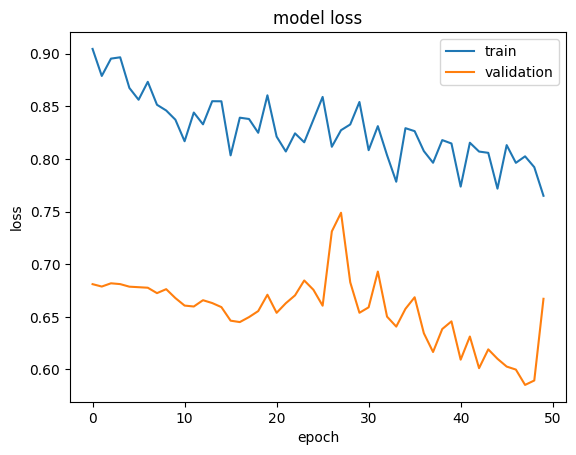

In [13]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

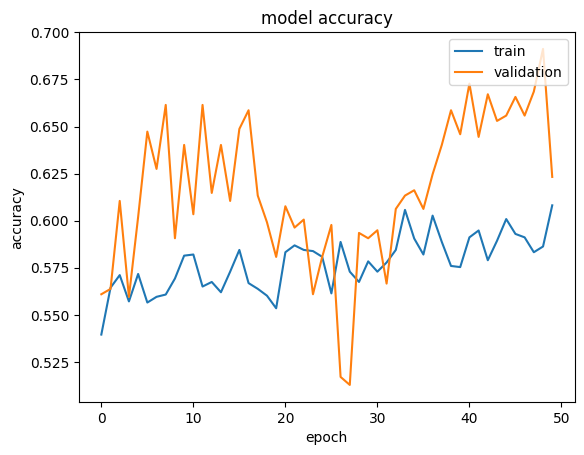

In [14]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [0]:
print('Training Accuracy: ', accuracy_score(y_train, model.predict_classes(X_train)[:,0]))
print('\nValidation Accuracy: ', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]))

Training Accuracy:  0.6743620899149453

Validation Accuracy:  0.6487252124645893
